### Assignment 6: Implement SGD for linear regression


To implement stochastic gradient descent to optimize a linear regression algorithm on Boston House Prices dataset which is already exists in sklearn as a sklearn.linear_model.SGDRegressor.here,SGD algorithm is defined manually and then comapring the both results.Linear regression is technique to predict on real values.

stochastic gradient descent technique , evaluates and updates the coefficients every iteration to minimize the error of a model on training data.

### Objective:
  
To Implement stochastic gradient descent on Bostan House Prices dataset for linear Regression

 * Implement SGD and deploy on Bostan House Prices dataset.
 * Comapare the Results with sklearn.linear_model.SGDRegressor




In [1]:
from sklearn.datasets import load_boston # to load  datasets from sklearn
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score

import sklearn.cross_validation
from sklearn.cross_validation import KFold
import numpy as np
import seaborn as sns

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
import pandas as pd
import math

import pytablewriter


C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X = load_boston().data
Y = load_boston().target
print(X.shape)
print(Y.shape)


(506, 13)
(506,)


In [3]:
boston = load_boston()
# Shape of Boston datasets
print(boston.data.shape)


(506, 13)


In [4]:
#  to understand datasets
print(boston.DESCR)


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
col= boston.feature_names
print(col)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# real price values of bostan house datasets.
print(boston.target[:10])

# Output is real valued number


[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [7]:
#https://github.com/priyagunjate/Implement-SGD-for-linear-regression/blob/master/Assignment6_working%20on.ipynb
# Boston datasets 
bostan = pd.DataFrame(boston.data)
print(bostan.head())
# Boston dataset with columns names
bostan_col =pd.DataFrame(boston.data,columns=col)
print(bostan_col.head())


        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  

### Boston Houses Features vs Price


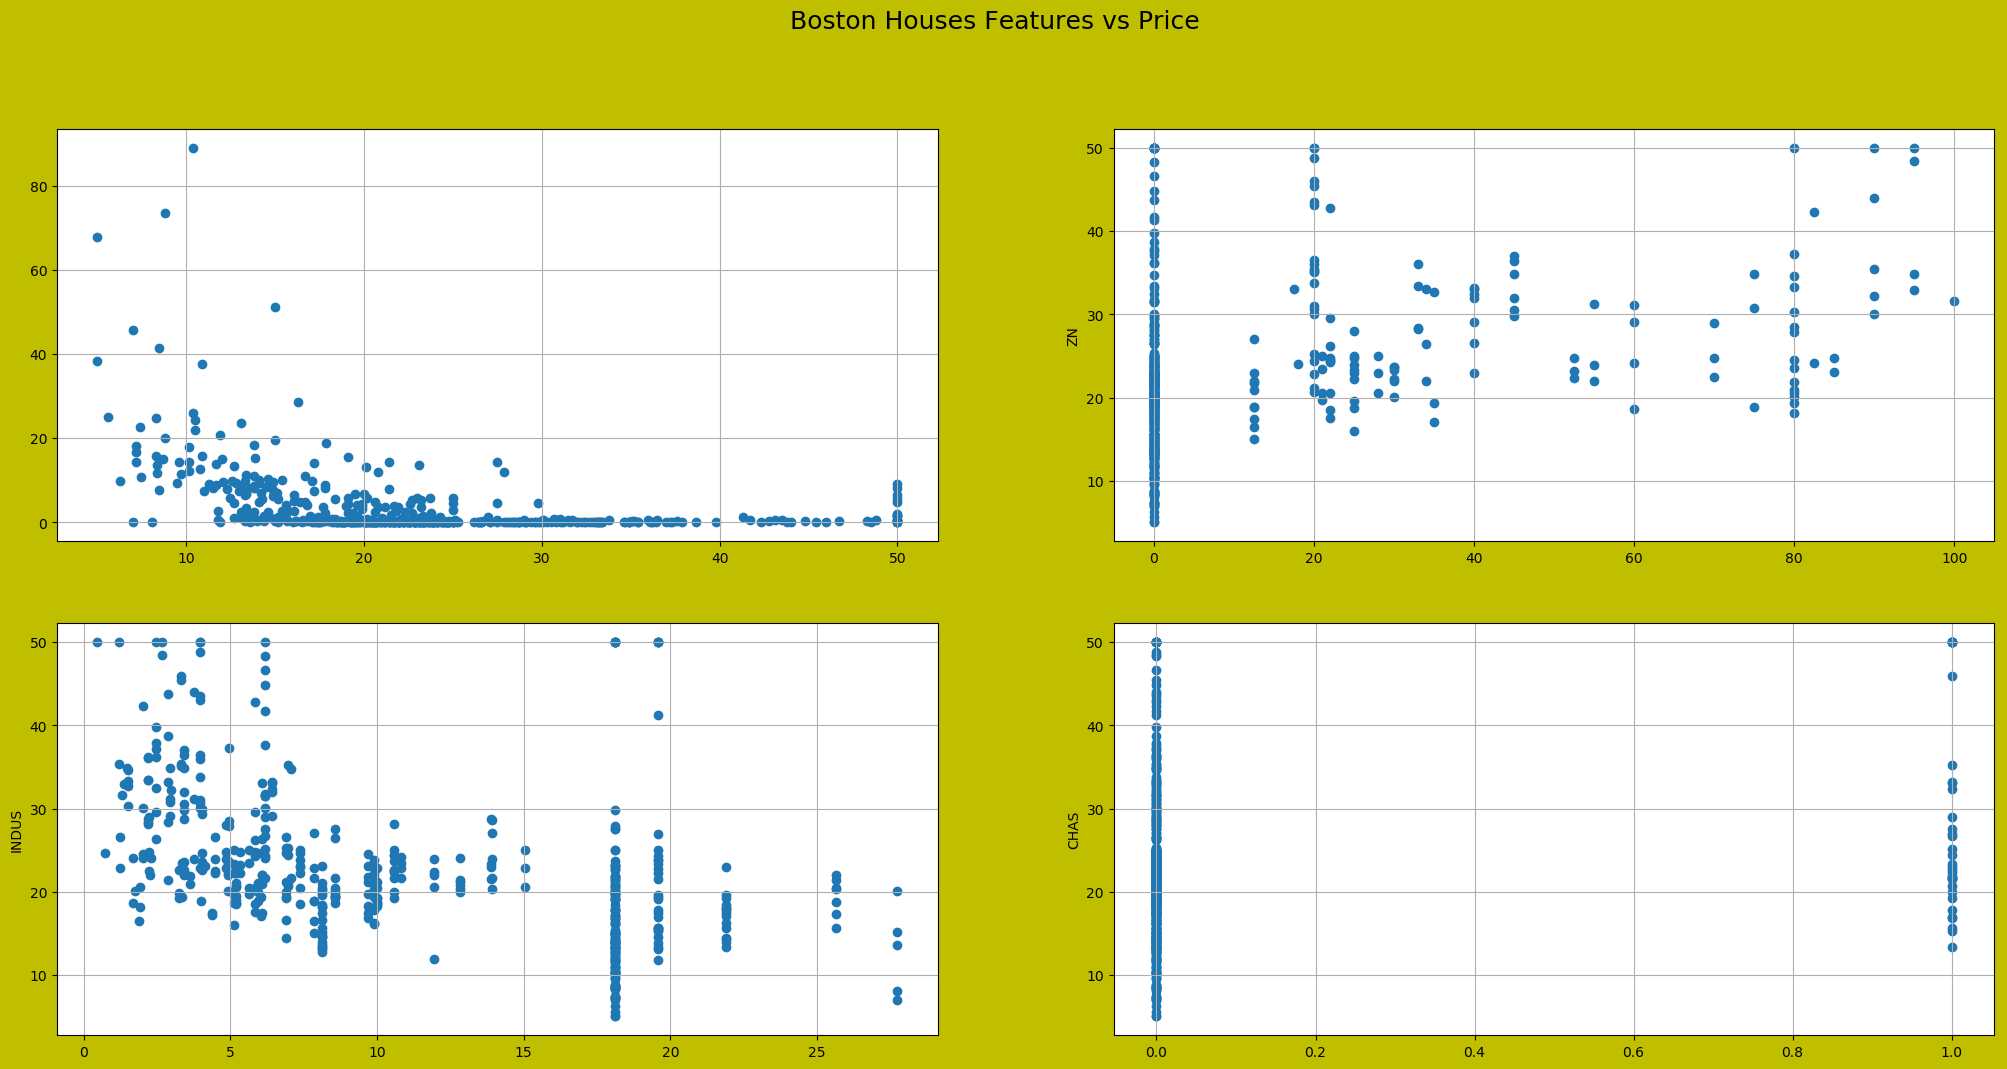

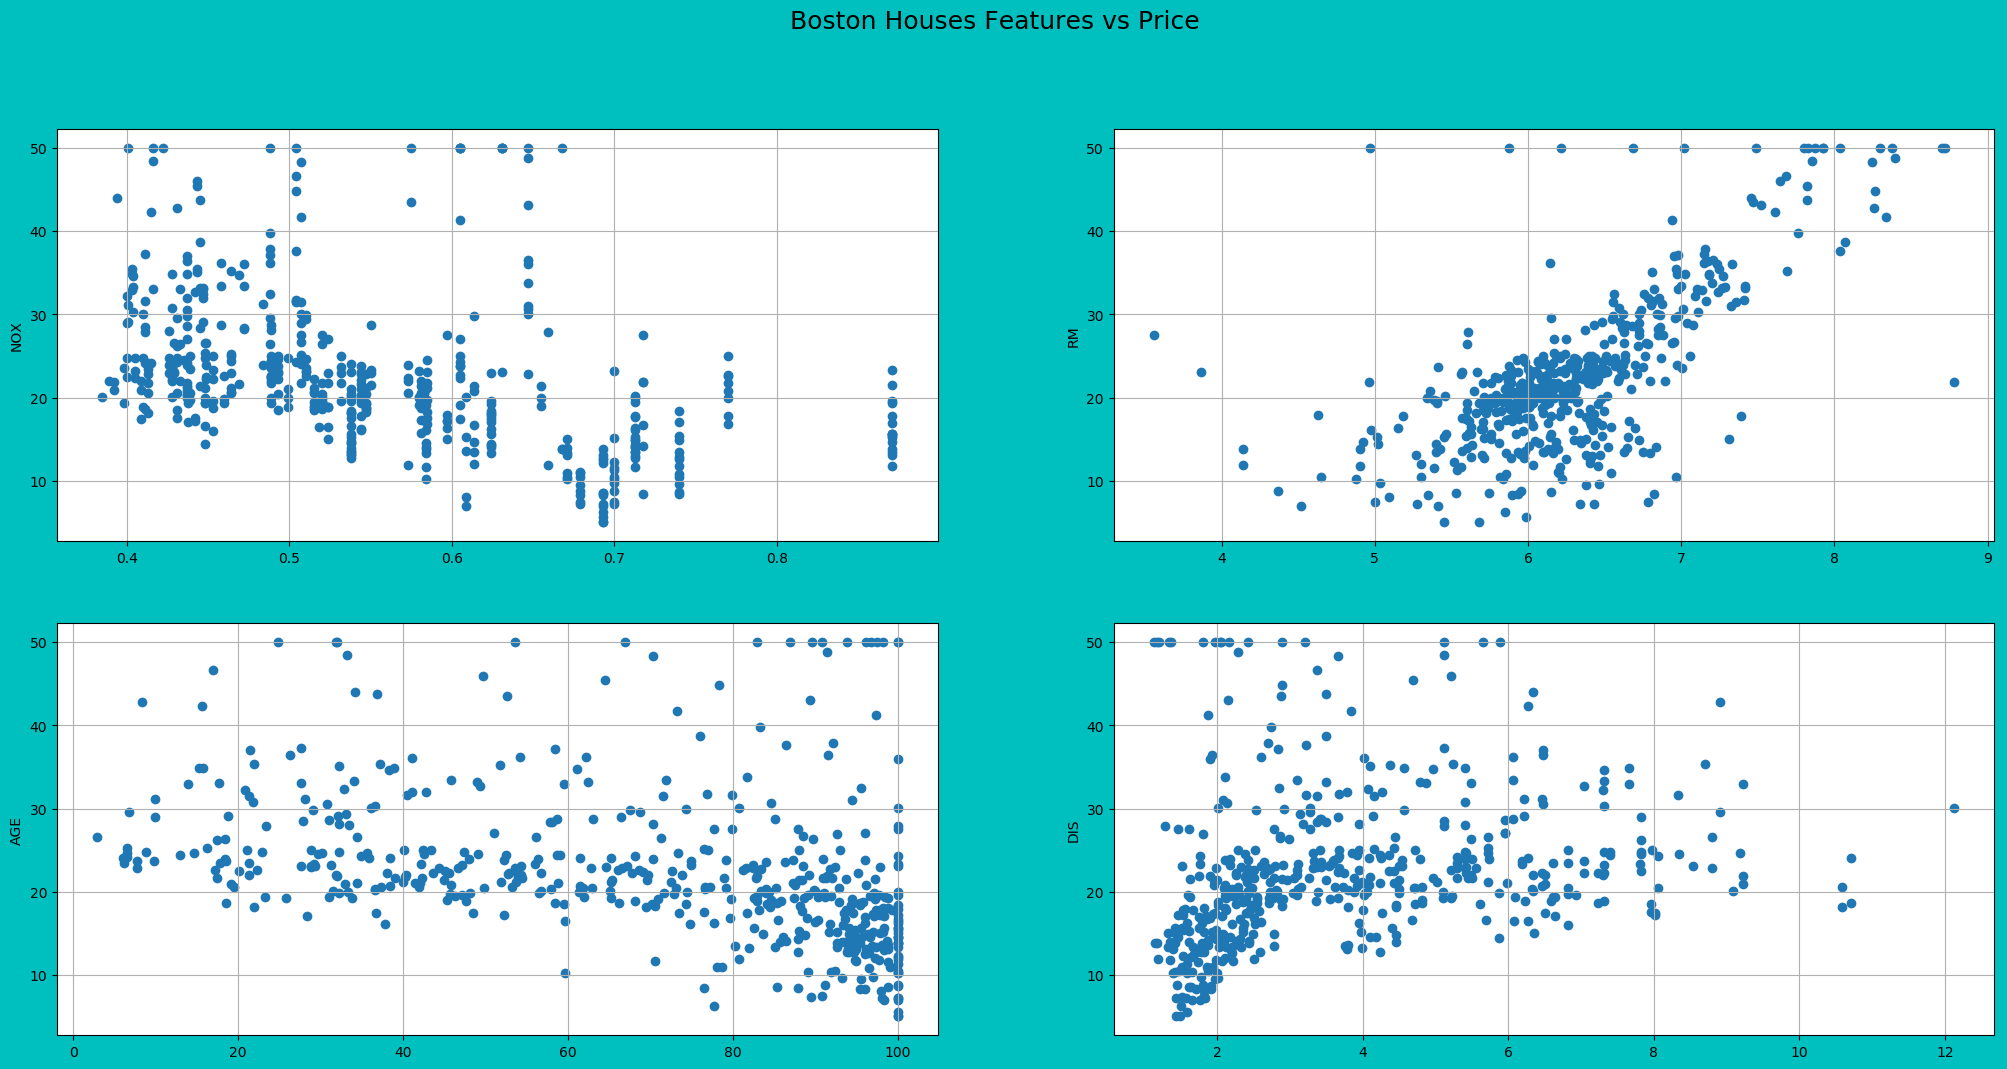

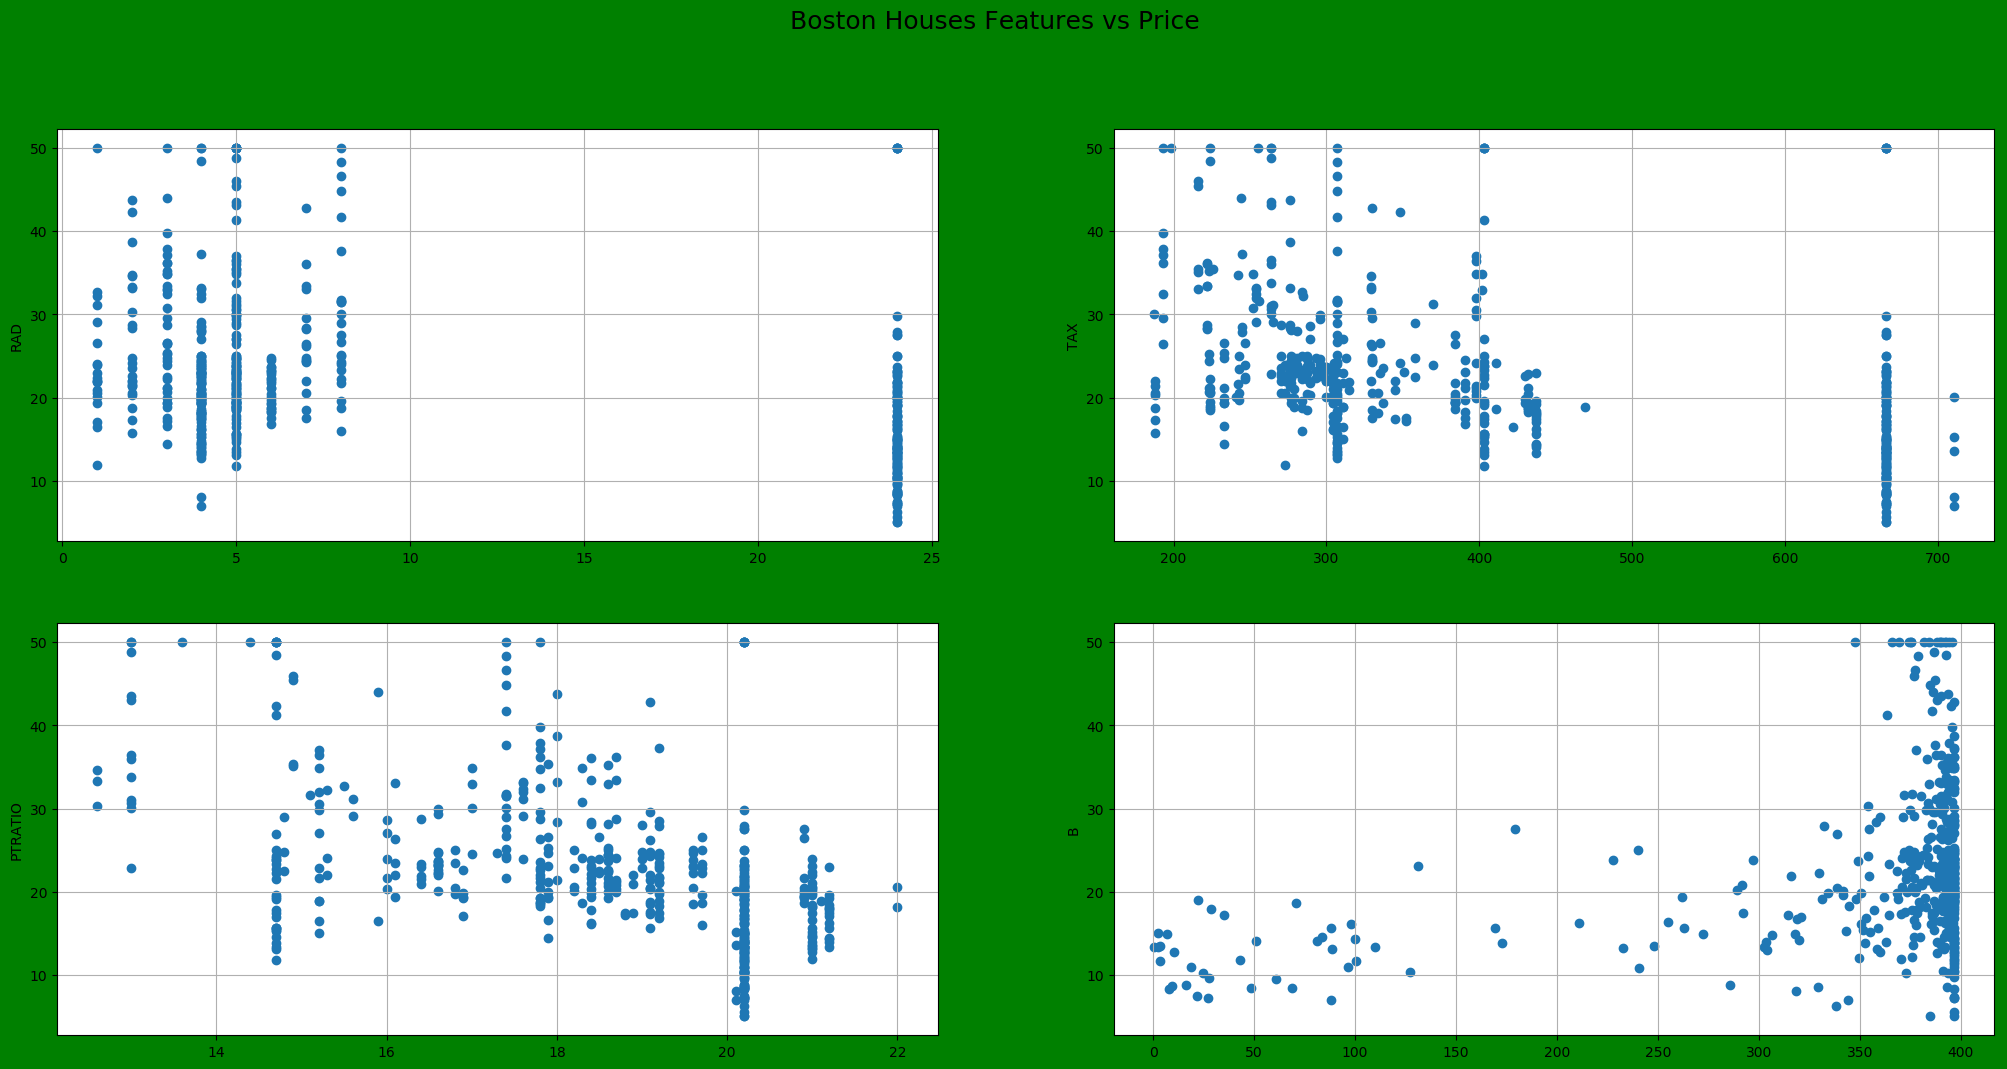

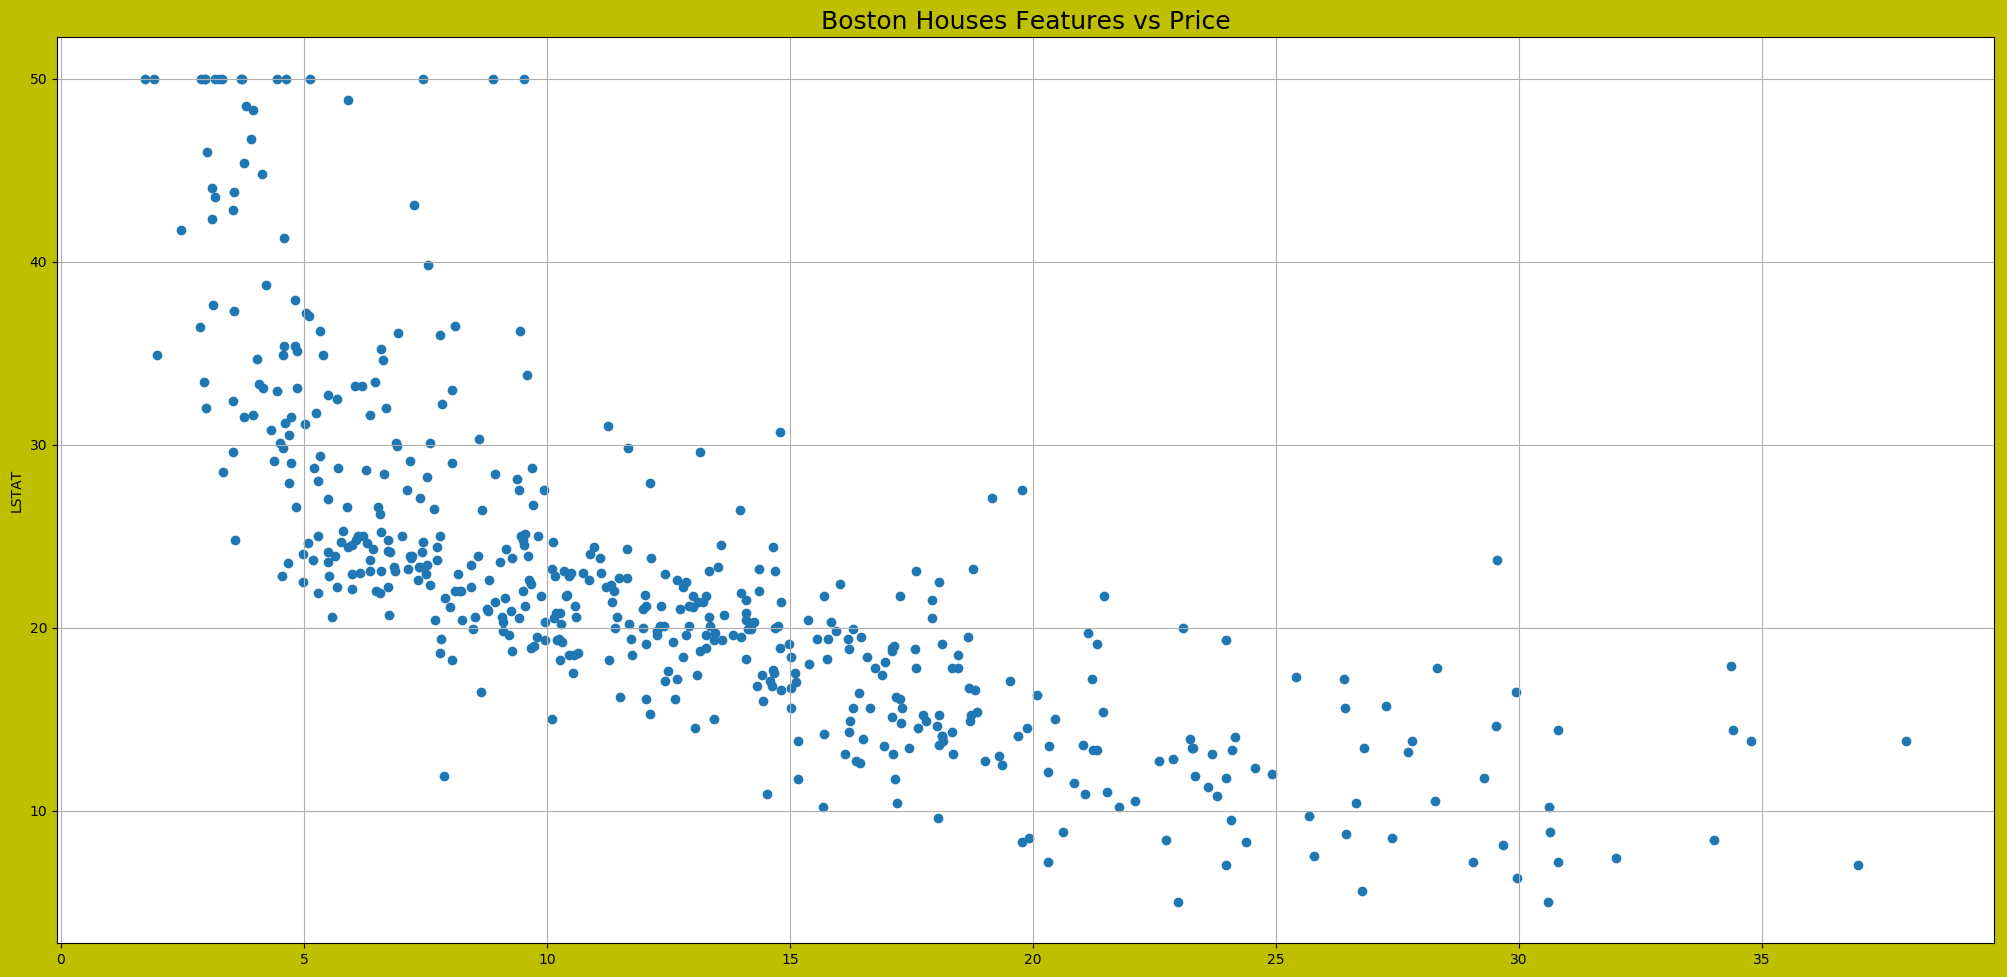

In [8]:
#https://github.com/priyagunjate/Implement-SGD-for-linear-regression/blob/master/Assignment6_working%20on.ipynb
#ax.title.set_text('Boston Houses Features vs Price')
fig = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='y', edgecolor='k')
fig.suptitle('Boston Houses Features vs Price', fontsize=18)
ax1 = fig.add_subplot(221)

ax1.scatter(boston.target,bostan_col.CRIM)
plt.grid()
ax2 = fig.add_subplot(222)
plt.ylabel('CRIM')
ax2.scatter(bostan_col.ZN,boston.target)
plt.ylabel('ZN')
plt.grid()
ax3 = fig.add_subplot(223)

ax3.scatter(bostan_col.INDUS,boston.target)
plt.ylabel('INDUS')
plt.grid()
ax4 = fig.add_subplot(224)
ax4.scatter(bostan_col.CHAS,boston.target)
plt.ylabel('CHAS')
plt.grid()
plt.show()
fig1 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='c', edgecolor='k')
fig1.suptitle('Boston Houses Features vs Price', fontsize=18)
ax5 = fig1.add_subplot(221)
ax5.scatter(bostan_col.NOX,boston.target)
plt.ylabel('NOX')
plt.grid()
ax6 = fig1.add_subplot(222)
ax6.scatter(bostan_col.RM,boston.target)
plt.ylabel('RM')
plt.grid()
ax7 = fig1.add_subplot(223)
ax7.scatter(bostan_col.AGE,boston.target)
plt.ylabel('AGE')
plt.grid()
ax8 = fig1.add_subplot(224)
ax8.scatter(bostan_col.DIS,boston.target)
plt.ylabel('DIS')
plt.grid()
plt.show()
fig2 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='g', edgecolor='k')
fig2.suptitle('Boston Houses Features vs Price', fontsize=18)
ax9 = fig2.add_subplot(221)
ax9.scatter(bostan_col.RAD,boston.target)
plt.ylabel('RAD')
plt.grid()
ax10 = fig2.add_subplot(222)
ax10.scatter(bostan_col.TAX,boston.target)
plt.ylabel('TAX')
plt.grid()
ax11 = fig2.add_subplot(223)
ax11.scatter(bostan_col.PTRATIO,boston.target)
plt.ylabel('PTRATIO')
plt.grid()
ax12 = fig2.add_subplot(224)
ax12.scatter(bostan_col.B,boston.target)
plt.ylabel('B')
plt.grid()
fig3 = plt.figure(num=None, figsize=(25, 12), dpi=100, facecolor='y', edgecolor='k')

plt.scatter(bostan_col.LSTAT,boston.target)
plt.title('Boston Houses Features vs Price', fontsize=18)
plt.ylabel('LSTAT')
plt.grid()
plt.show()




In [9]:
bostan['PRICE'] = boston.target
# Boston datasets with 13 feautures  label as X
X = bostan.drop('PRICE', axis = 1) 
#Boston dataset's price for 13 features lanel as Y
Y = bostan['PRICE']

print(X.head())
print(Y.shape)



        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  
(506,)


### Training and testing datasets splitting with cross_validation


In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_df = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(X)))

Y_df=Y


In [11]:
# Training and testing datasets splitting with cross_validation
# Training and testing splitting data with 70% and 30%
# randomserach cross_validation is used
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_df,
                                                                             Y_df,
                                                                             test_size = 0.40,
                                                                             random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))


(303, 13)
(203, 13)
(303,)
(203,)
<class 'pandas.core.frame.DataFrame'>


### linear Regression on Bostan House Dataset


RMSE= 5.389698975977016


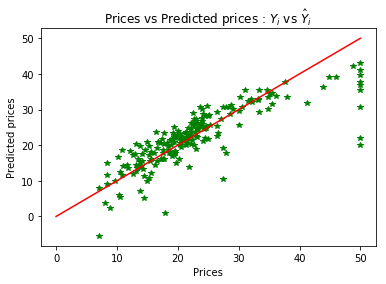

In [12]:
#https://github.com/priyagunjate/Implement-SGD-for-linear-regression/blob/master/Assignment6_working%20on.ipynb
#linear Regression on Bostan House Dataset
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
error=abs(Y_test-Y_pred)
total_error = np.dot(error,error)
# Compute RMSE
rmse_lr= np.sqrt(total_error/len(error))
print('RMSE=',rmse_lr)
#plt.show()
plt.plot(Y_test, Y_pred,'g*')
plt.plot([0,50],[0,50], 'r-')
plt.title("Prices vs Predicted prices : $Y_i$ vs $\hat{Y}_i$")
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.show()


### Delta_Error and Prediction of price using Linear regression


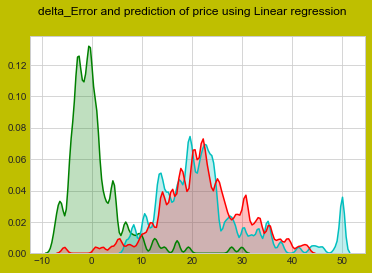

In [13]:
delta_y = Y_test - Y_pred
import seaborn as sns
fig3 = plt.figure( facecolor='y', edgecolor='k')
fig3.suptitle('delta_Error and prediction of price using Linear regression', fontsize=12)

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),shade=True, color="g", bw=0.5)
sns.kdeplot(np.array(Y_test),shade=True, color="c", bw=0.5)
sns.kdeplot(np.array(Y_pred),shade=True, color="r", bw=0.5)


* Red region is predicted price for bostan house datsets
* Blue Region is for y_test
* Green Region is difference between actual one and Predicted one.


##  sklearn.linear_model.SGDRegressor


### alpha is as learning rate


### n_iter is as batch size


In [14]:
models_performence1 = {
    'Model':[],
    'Batch_Size':[],
    'RMSE': [], 
    'MSE':[],
    'Iteration':[],
    'Optimal learning Rate':[],

}   
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)
   

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


In [15]:
def square(list):
        return [(i ** 2) for i in list]


In [16]:
#https://github.com/priyagunjate/Implement-SGD-for-linear-regression/blob/master/Assignment6_working%20on.ipynb
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
#Here, alpha is as learning rate
 
def sgdreg_function(x,initial_batch_size):
    #initial_batch_size=100
    batch=[]
    for l in range(x):
        batch_size_value= initial_batch_size + initial_batch_size * l
        batch.append(batch_size_value)
        z=0
        scale_max=np.max(Y_test[0:batch_size_value])
        Learning_rate=1 # initial learning rate=1
        score=[]
        LR=[] # storing value for learning rate
        Total_score=[]
        epoch1=[]
        global delta_error
        delta_error=[]
        Y_Test=[]
        global Y_hat_Predicted
        Y_hat_Predicted=[]
        test_cost=[]
        train_cost=[]
        n_iter=100
        for k in range(1,batch_size_value+1):
            # Appending learning rate 
            LR.append(Learning_rate) 
            
# SGDRegressor
            sgdreg = linear_model.SGDRegressor(penalty='none', 
                                               alpha=Learning_rate
                                               , n_iter=100)
            yii=Y_train[0:batch_size_value]
            xii=X_train[0:batch_size_value]
            xtt=X_test[0:batch_size_value]
            ytt=Y_test[0:batch_size_value]
            Y_Test.append(ytt)
 
            clf=sgdreg.fit(xii,yii)
            Traing_score=clf.score(xii,yii)
            train_cost.append(Traing_score)
            training_error=1-Traing_score
            # p predicting on x_test
            y_hat = sgdreg.predict(xtt)
            #testing_score=clf.score()
            clf1=sgdreg.fit(xtt,ytt)
            Testing_score=clf1.score(xtt,ytt)
            test_cost.append(Testing_score)
            Testing_error=1-Testing_score
            Y_hat_Predicted.append(y_hat)
            # error = Y_test - y_prediction
            err = abs(ytt - y_hat)
            delta_error.append(err)
            score.append(Testing_score)
            # print(rmse)
            # Iteration 
            iteration_no=sgdreg.n_iter_
            epoch1.append(iteration_no)
            #print('Epoch=',iteration_no)
            #print('Learning_rate',Learning_rate) 
            Learning_rate=Learning_rate/2
            z+=1
        print("Training Error=",training_error)  
        print("Testing_error",Testing_error)
        models_performence1['Model'].append('sklearn.linear_model.SGDRegressor')
        # graph (Y_test) Prices Vs  (Y_prediction) Predicted prices
        fig4 = plt.figure( facecolor='c', edgecolor='k')
        fig4.suptitle('(Y_test) Prices Vs  (Y_prediction) Predicted prices: $Y_i$ vs $\hat{Y}_i$ with batch size='+str(batch[l]), fontsize=12)
        plt.plot(Y_Test,Y_hat_Predicted,'g*')
        plt.plot([0,batch_size_value],[0,batch_size_value], 'r-')
        plt.xlabel('Y_test')
        plt.ylabel('Y_predicted')
        plt.show()
        # Plot delta_Error and prediction of price
        fig3 = plt.figure( facecolor='y', edgecolor='k')
        fig3.suptitle('delta_Error and prediction of price with batch size='+str(batch[l]), fontsize=12)
        sns.set_style('darkgrid')
        Y_sklearn=np.array(sum(delta_error)/len(delta_error))
        sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )
        sns.kdeplot(np.array(y_hat),shade=True, color="r", bw=0.5)
        plt.show()

       # Plot epoch Vs  RMSE
        fig= plt.figure( facecolor='y', edgecolor='k')
        fig.suptitle('epoch Vs  RMSE with batch size='+str(batch[l]), fontsize=12)
        ax1 = fig.add_subplot(111)          
        plt.plot(epoch1,score,'m*',linestyle='dashed')
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('RMSE with batch size=')

        models_performence1['Iteration'].append(sum(epoch1)/len(epoch1))
        
                # plot Iterations Vs Train Cost & Test cost
        fig4 = plt.figure( facecolor='c', edgecolor='k')
        fig4.suptitle('Iterations Vs Train Cost & Test cost with batch size='+str(batch[l]), fontsize=12)
        plt.plot(epoch1,train_cost,'m*',linestyle='dashed', label='Train cost')
        plt.plot(epoch1,test_cost,'r*', linestyle='dashed',label='Test cost')
        plt.legend(loc='lower left')
        plt.grid()
        plt.xlabel('Iterations ')
        plt.ylabel('Performance Cost  ')
        plt.show()
        
        # Plot Learning rate Vs  RMSE
        fig2 = plt.figure( facecolor='y', edgecolor='k')
        fig2.suptitle('Learning rate Vs  RMSE with batch size='+str(batch[l]), fontsize=12)
        ax2 = fig2.add_subplot(111)
        #ax2.set_title("Learning rate Vs  RMSE")
        plt.plot(LR,score,'m*',linestyle='dashed')
        plt.grid()
        plt.xlabel('Learning rate')
        plt.ylabel('RMSE')
        plt.show() 

        
        global best_Learning_rate
        best_Learning_rate=LR[score.index(min(score))]
        models_performence1['Optimal learning Rate'].append(best_Learning_rate)
        print('\nThe best value of best_Learning_rate is %d.' % (best_Learning_rate),7)
        MSEscore=scale_max*sum(score)/len(score)
        score_value=np.sqrt(MSEscore)
        print('Batch Size',batch[l])

                
        models_performence1['Batch_Size'].append(batch[l])
        print("RMSE with batch size="+str(batch[l]),score_value)

        models_performence1['RMSE'].append(score_value)
        print("MSE with batch size="+str(batch[l]),MSEscore)
        models_performence1['MSE'].append(MSEscore)






* sgdreg_function is function for stochastic gradient descen for linear regression using linear_model.SGDRegressor in sklearn.

* In this function different batch size (50,100,150,200) is applied on linear_model.SGDRegressor to get best learning rate,epoch value,error rate.

* here,delta_Error and prediction of price with batch size graph is shown.

* here,delta_Error and prediction of price with batch size graph is shown.

* Also,RMSE vs learning rate graph is shown for different batch value.


### linear_model.SGDRegressor in sklearn for different batch size


Training Error= 0.5342777340327791
Testing_error 0.33843085041534215


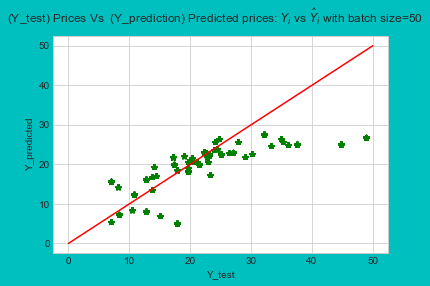

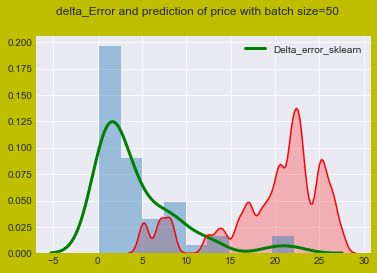

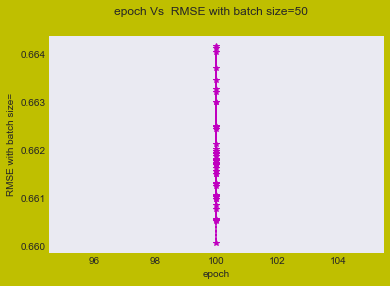

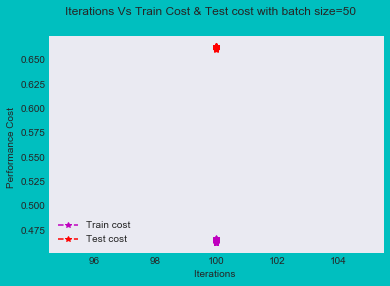

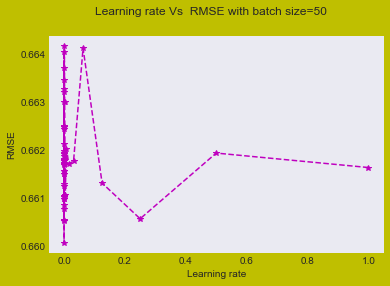


The best value of best_Learning_rate is 0. 7
Batch Size 50
RMSE with batch size=50 5.683407638715529
MSE with batch size=50 32.301122387810025
Training Error= 0.43887727060263537
Testing_error 0.39049291346151915


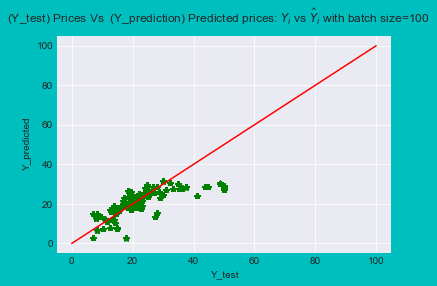

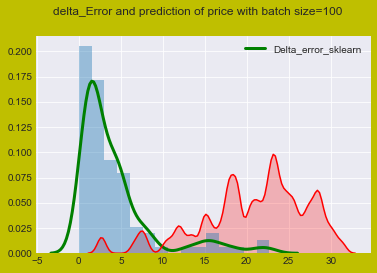

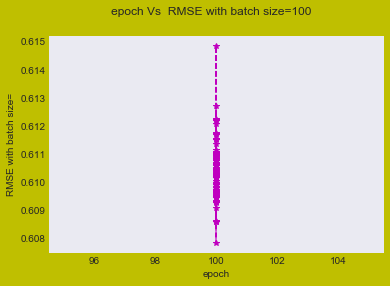

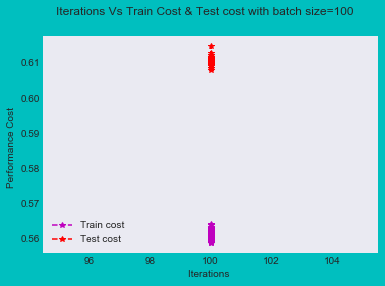

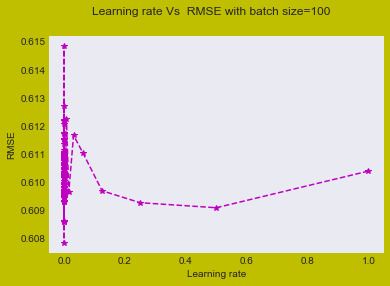


The best value of best_Learning_rate is 0. 7
Batch Size 100
RMSE with batch size=100 5.524277762723608
MSE with batch size=100 30.51764479972256
Training Error= 0.3378367131243887
Testing_error 0.42092492606128973


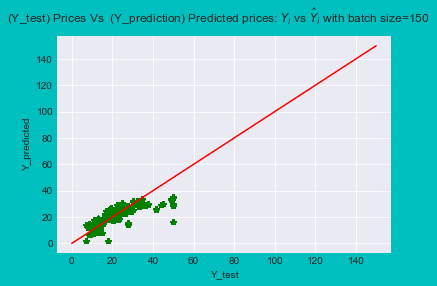

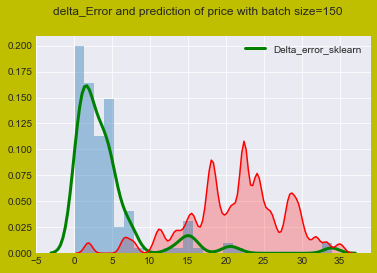

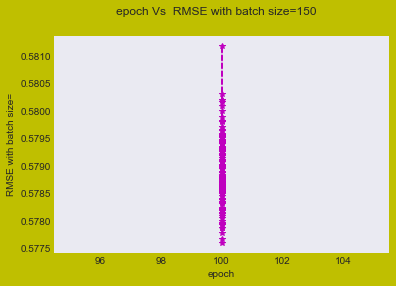

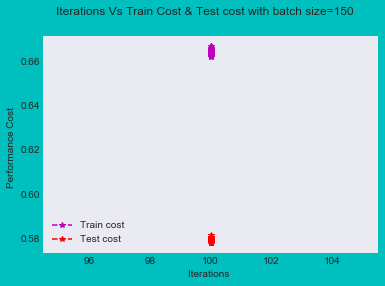

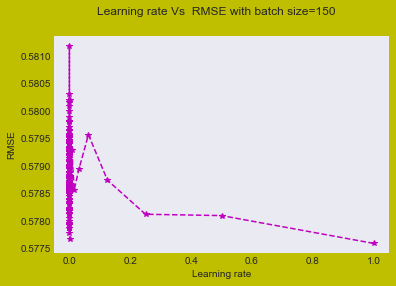


The best value of best_Learning_rate is 1. 7
Batch Size 150
RMSE with batch size=150 5.3800946358234265
MSE with batch size=150 28.94541829041601
Training Error= 0.3799649262988809
Testing_error 0.38589361949076917


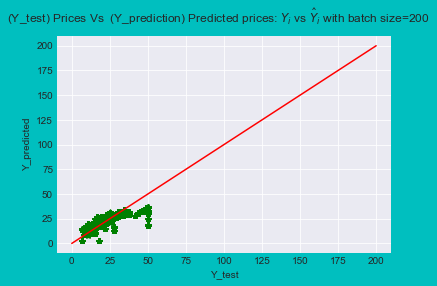

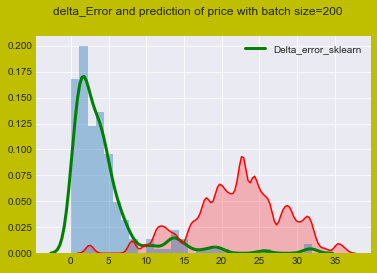

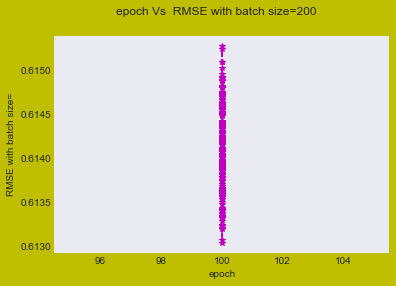

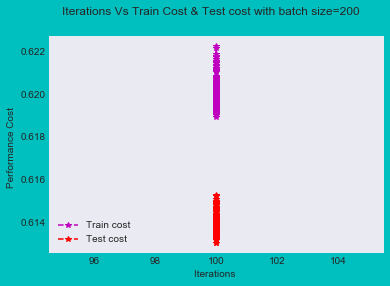

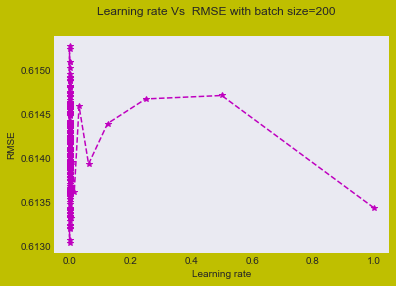


The best value of best_Learning_rate is 0. 7
Batch Size 200
RMSE with batch size=200 5.541170872533618
MSE with batch size=200 30.704574638614975


In [17]:
sgdreg_function(4,50)


In [18]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)


,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,sklearn.linear_model.SGDRegressor,50,5.683408,32.301122,100.0,5.960464e-08
1,sklearn.linear_model.SGDRegressor,100,5.524278,30.517645,100.0,1.421085e-14
2,sklearn.linear_model.SGDRegressor,150,5.380095,28.945418,100.0,1.000000e+00
3,sklearn.linear_model.SGDRegressor,200,5.541171,30.704575,100.0,1.336382e-51


### Observation:
* In sklearn SGDRegressor,It is observed that as batch size increases optimal learning rate decreses.
* RMSE value is around 5 and MSE value is around 30
* RMSE value for batch size 100 is high comparatively with others batch size.
* For Batch size=200, RMSE & learning Rate is lowest.


## Standardization training and testing data according to batch size
 
 ## Manual SGD function
 
 ### L(w,b)=min w,b{sum(square{yi-wTxi-b})}

### Derivative of Lw w.r.t w ==>Lw= sum({-2*xi}{yi-wT.xi-b})

### Derivative of Lb w.r.t b==>lb=sum(-2*{yi-wTxi-b})






In [36]:
models_performence1 = {
    'Model':[],
    'Batch_Size':[],
    'RMSE': [], 
    'MSE':[],
    'Iteration':[],
    'Optimal learning Rate':[],

}   
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)
   

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


In [37]:
def denorm(scale,list):
    return [(scale*i) for i in list]
# scale

scale=np.max(Y_test)
print(scale)



50.0


In [38]:
#https://github.com/priyagunjate/Implement-SGD-for-linear-regression/blob/master/Assignment6_working%20on.ipynb
# SGD function
#L(w,b)=min w,b{sum(square{yi-wTxi-b})}
def SGD(batch_size): 
    
    X_batch_size =X_train[:batch_size]
    price_batch_size =Y_train[:batch_size]
    X_test_batch=X_test[:batch_size]
    ytt_batch_size= Y_test[:batch_size]
    
    
    N = len(X_batch_size)
    xi_1=[]
    yprice=[]
    xtt=[]
    ytt=[]
    ytt1=[]
    for j in range(N):
     # standardization of datasets
        scaler = StandardScaler()
        scaler.fit(X_batch_size) 
        X_scaled_batch_size = scaler.transform(X_batch_size)
        X_scaled_batch_size=preprocessing.normalize(X_scaled_batch_size)
        xi_1.append(X_scaled_batch_size)

        X_test_batch_size=scaler.transform(X_test_batch)
        X_test_batch_size=preprocessing.normalize(X_test_batch_size)
        xtt.append(X_test_batch_size)
        Y_scaled_batch_size=np.asmatrix(price_batch_size)
        Y_scaled_batch_size=preprocessing.normalize(Y_scaled_batch_size)
        yprice.append(Y_scaled_batch_size)
        Ytt_scaled_batch_size1=np.asmatrix(Y_test[:batch_size])
        Ytt_scaled_batch_size=preprocessing.normalize(Ytt_scaled_batch_size1)
        ytt1.append(Ytt_scaled_batch_size1)
        ytt.append(Ytt_scaled_batch_size)

        
    xi=xi_1
    price=yprice
   
    Lw = 0
    Lb = 0
    learning_rate = 1
    iteration = 1
    w0_random = np.random.rand(13)
    w0 = np.asmatrix(w0_random).T
    b = np.random.rand()
    b0 = np.random.rand() 
    global learning_rate1
    learning_rate1=[]
    global epoch
    epoch=[]
    global rmse1
    rmse1=[]
    global y_hat_manual_SGD
    y_hat_manual_SGD=[]
    global delta_Error
    delta_Error=[]

    
    while True:
        learning_rate1.append(learning_rate)
        epoch.append(iteration)

        for i in range(N):
            wj=w0
            bj=b0
            #derivative of Lw w.r.t w
            #Lw= sum({-2*xi}{yi-wT.xi-b})
            #print(price[i] .shape)
            Lw = (1/N)*np.dot((-2*xi[i].T ), (price[i] - np.dot( xi[i],wj) - bj))
            #derivative of Lb w.r.t b
            #lb=sum(-2*{yi-wTxi-b})
            Lb = (-2/N)*(price[i] - np.dot( xi[i],wj ) - bj)
            #print('yi',Lw.shape)
            y_new=(1/N)*(xtt[i].dot(Lw))+Lb 
            #print(y_new[i])
            y_pred=np.absolute(np.array(y_new[i]))
            y_hat_manual_SGD.append( y_pred)

            delta_error = np.absolute(np.array(ytt[i] ) - np.array(y_new[i]))
            delta_Error.append(delta_error.mean())
            #delta_error=price[i]  - y_new[i]  

            error=np.sum(np.dot(delta_error ,delta_error.T))

        rmse1.append(error)
        w0_new = Lw * learning_rate
        b0_new = Lb * learning_rate
        wj = w0 - w0_new
        wj = w0 - w0_new
        iteration += 1
        if (w0==wj).all():
            break
        else:
            w0 = wj
            b0 = bj
            learning_rate = learning_rate/2

    print("For batch_size"+str(batch_size))

    RMSE=(scale*np.asarray(rmse1))

    # Y_test function

    vvv=denorm(1,ytt1)
    cv=vvv[0] 
    
    # Y_hat_test function after normationzation

    cvv=denorm(scale,y_hat_manual_SGD[batch_size])        
    #print(sum(delta_error)/len(delta_error))
    fig4 = plt.figure( facecolor='c', edgecolor='k')
    fig4.suptitle('(Y_test) Prices Vs  (Y_prediction) Predicted prices: $Y_i$ vs $\hat{Y}_i$ with batch size=', fontsize=12)
    plt.plot(cv,cvv,'g*')
    plt.plot([0,batch_size],[0,batch_size], 'r-')
    plt.xlabel('Y_test')
    plt.ylabel('Y_predicted')
    plt.show()
   
    #Plot delta_Error and prediction of price

    fig3 = plt.figure( facecolor='y', edgecolor='k')
    fig3.suptitle('delta_Error  with batch size='+str(batch_size), fontsize=12)
    sns.set_style('darkgrid')
    sns.distplot(np.array(delta_Error),kde_kws={"color": "r", "lw": 3, "label": "Delta_error_manual"} )

    #sns.kdeplot(np.array(ghy),shade=True, color="r", bw=0.5)

    plt.show()

    #For plotting epoch vs RMSE

    models_performence1['Model'].append('SGD Manual Function')
    models_performence1['Batch_Size'].append(batch_size)
    fig = plt.figure( facecolor='c', edgecolor='k')
    fig.suptitle('epoch Vs RMSE with batch size='+str(batch_size), fontsize=12)
    ax1 = fig.add_subplot(111)
    plt.plot(epoch,RMSE,'r*',linestyle='dashed')
    plt.xlabel('epoch')
    plt.ylabel('RMSE with batch size='+str(batch_size))
    plt.plot(epoch,RMSE,'y',linestyle='dashed')
    plt.show()

 #Best learning rate

    global best_Learning_rate1
    best_Learning_rate1=learning_rate1[rmse1.index(min(rmse1))]
    print('\nThe best value of best_Learning_rate is %d.' % (best_Learning_rate1))
    models_performence1['Optimal learning Rate'].append(best_Learning_rate1)
    fig1 = plt.figure( facecolor='y', edgecolor='k')
    fig1.suptitle('Learning rate Vs RMSE with batch size='+str(batch_size), fontsize=12)
    ax1 = fig1.add_subplot(111)
    plt.plot(learning_rate1,rmse1,'m*')
    plt.xlabel('Learning rate')
    plt.ylabel('RMSE')

    
    global RMSE_value
    MSE_value = sum(rmse1)/len(rmse1)
    print("MSE_value=",MSE_value  )
    models_performence1['MSE'].append(MSE_value)
    RMSE_value =np.sqrt(MSE_value)
    models_performence1['RMSE'].append(RMSE_value)

    
    models_performence1['Iteration'].append(iteration)
    

    print("RMSE = ",RMSE_value)
    print('For batch size'+str(batch_size))
    
    print('iteration =',iteration)
    
    print('Total number of learning_rate=',len(learning_rate1))
    plt.plot(learning_rate1,rmse1,'y',linestyle='dashed')
    plt.show()
    



50
For batch_size50


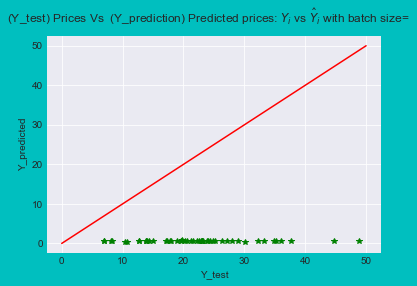

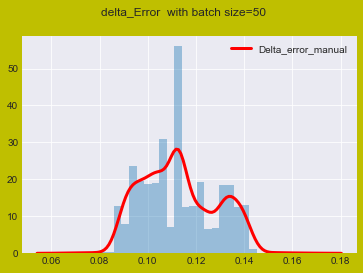

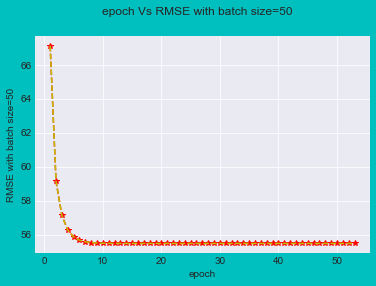


The best value of best_Learning_rate is 0.
MSE_value= 1.1166129571020138
RMSE =  1.0566990854079574
For batch size50
iteration = 54
Total number of learning_rate= 53


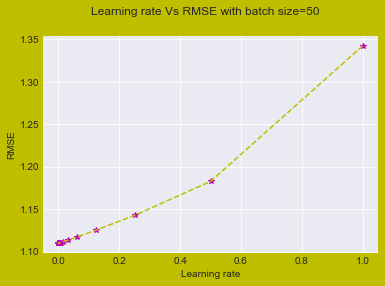

100
For batch_size100


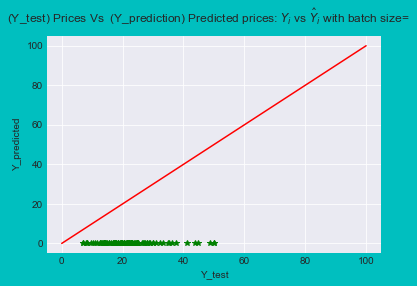

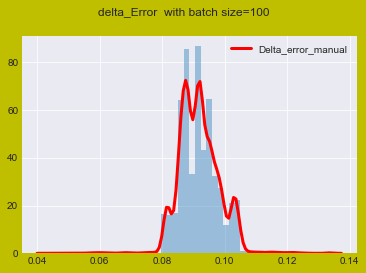

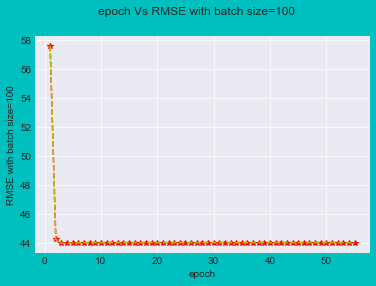


The best value of best_Learning_rate is 0.
MSE_value= 0.8860550648842539
RMSE =  0.9413049797404951
For batch size100
iteration = 56
Total number of learning_rate= 55


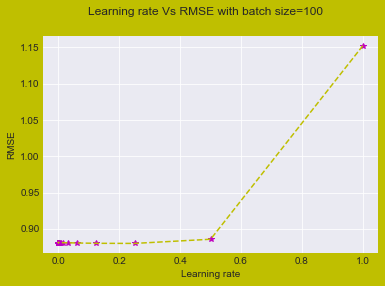

150
For batch_size150


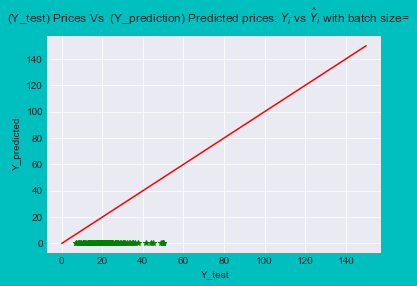

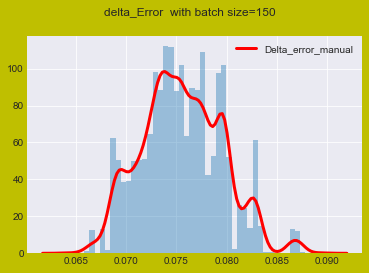

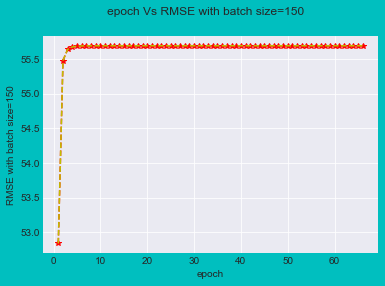


The best value of best_Learning_rate is 1.
MSE_value= 1.1128481991303567
RMSE =  1.0549162047908625
For batch size150
iteration = 67
Total number of learning_rate= 66


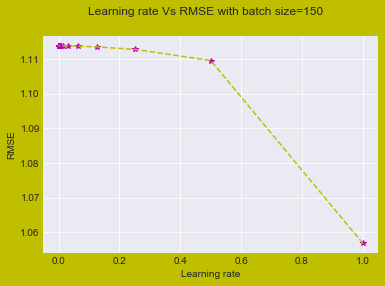

200
For batch_size200


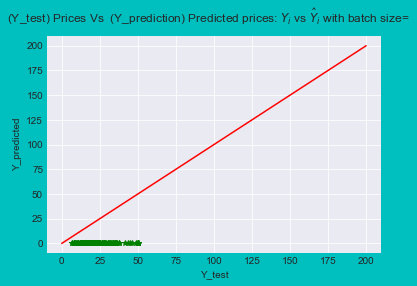

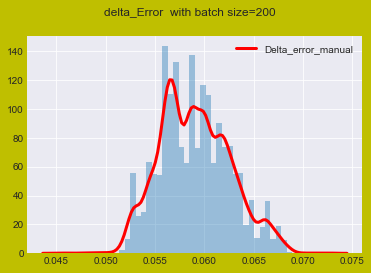

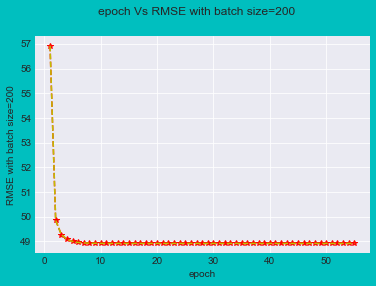


The best value of best_Learning_rate is 0.
MSE_value= 0.9818120404239267
RMSE =  0.9908642896097964
For batch size200
iteration = 56
Total number of learning_rate= 55


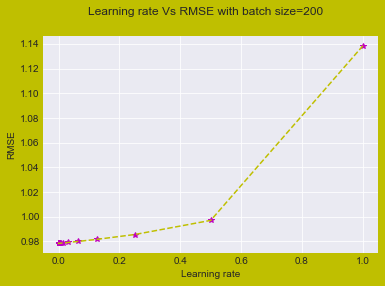

In [39]:
initial_batch_size=50

for l in range(4):
    batch_size_value= initial_batch_size + initial_batch_size * l
    
    print(batch_size_value)
    SGD(batch_size_value)


In [41]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)


,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,SGD Manual Function,50,1.056699,1.116613,54,3.552714e-15
1,SGD Manual Function,100,0.941305,0.886055,56,2.500000e-01
2,SGD Manual Function,150,1.054916,1.112848,67,1.000000e+00
3,SGD Manual Function,200,0.990864,0.981812,56,3.552714e-15


In [42]:
# SGD_Manual Vs SGD_sklearn
models_performence1 = {
    'Model':[],
    'Batch_Size':[],
    'RMSE': [], 
    'MSE':[],
    'Iteration':[],
    'Optimal learning Rate':[],

}   
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)
   
    

,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate


For batch_size150


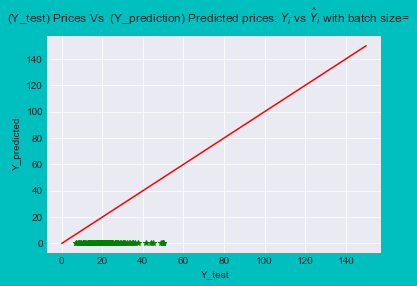

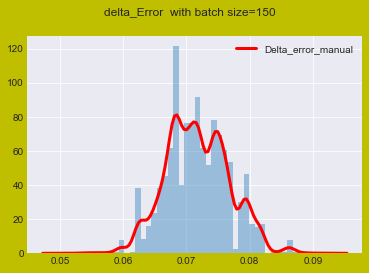

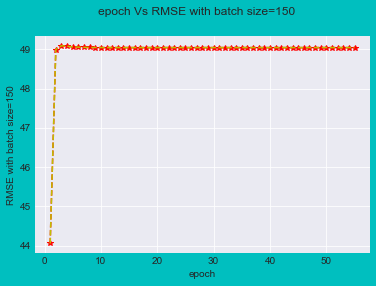


The best value of best_Learning_rate is 1.
MSE_value= 0.9791222878818965
RMSE =  0.9895060827917616
For batch size150
iteration = 56
Total number of learning_rate= 55


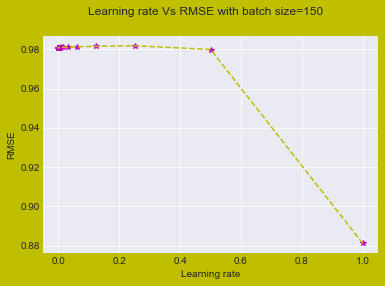

In [35]:
SGD(150)


Training Error= 0.3355416365901517
Testing_error 0.4206353363284472


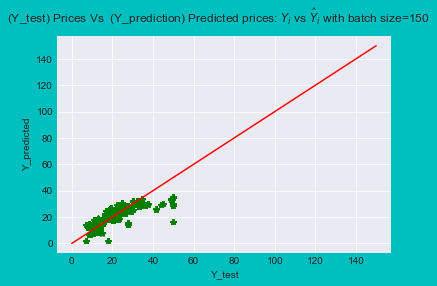

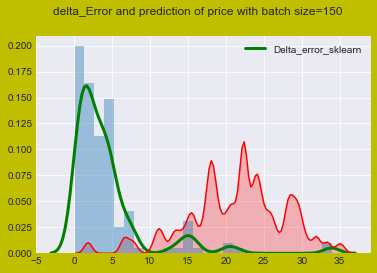

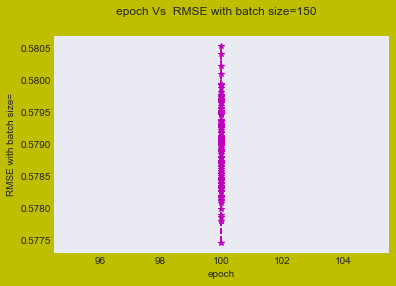

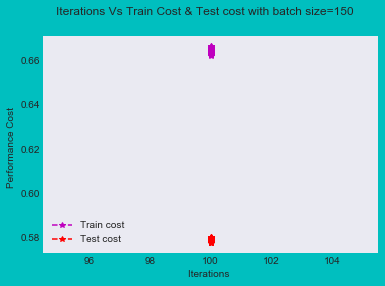

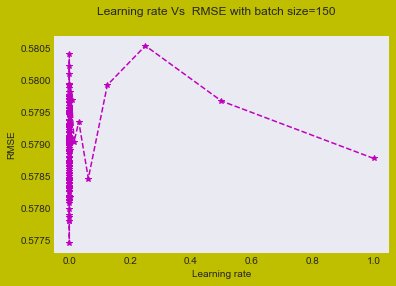


The best value of best_Learning_rate is 0. 7
Batch Size 150
RMSE with batch size=150 5.380455281938753
MSE with batch size=150 28.949299040942623


In [43]:
sgdreg_function(1,150)


## Y_predicted using manual SGD Vs Y_predicted using Sklearn SGD


### Y_predicted using manual SGD == y_hat_manual_SGD


### Error(y-y_hat) for manual SGD == delta_Error


### Y_predicted using Sklearn SGD == Y_hat_Predicted


### Error(y-y_hat) for SKlearn SGD == delta_error


In [45]:
#https://github.com/priyagunjate/Implement-SGD-for-linear-regression/blob/master/Assignment6_working%20on.ipynb
def y_hat_cal(delta_error_sklearn,delta_Error_manual):
    fig41 = plt.figure( facecolor='y', edgecolor='k')
    fig41.suptitle('Y_predicted using manual SGD Vs Y_predicted using Sklearn SGD ', fontsize=12)
    sns.set_style('darkgrid')
    Y_sklearn=np.array(sum(delta_error_sklearn)/len(delta_error_sklearn))
    Y_manual=np.array(delta_Error_manual)
    #print(Y_manual[0])
    sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )
    sns.distplot(Y_manual,kde_kws={"color": "r", "lw": 3, "label": "Delta_error_manual"} )
    fig51 = plt.figure( facecolor='y', edgecolor='k')
    fig51.suptitle('Y_predicted using manual SGD ', fontsize=12)
    sns.distplot(Y_sklearn,kde_kws={"color": "g", "lw": 3, "label": "Delta_error_sklearn"} )

    
    fig41 = plt.figure( facecolor='y', edgecolor='k')
    fig41.suptitle(' Y_predicted using Sklearn SGD ', fontsize=12)
    sns.distplot(Y_manual,kde_kws={"color": "r", "lw": 3, "label": "Delta_error_manual"} )




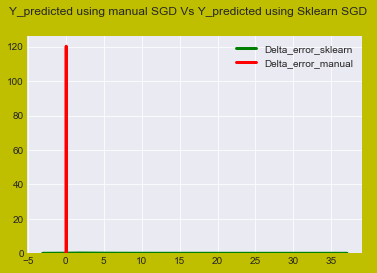

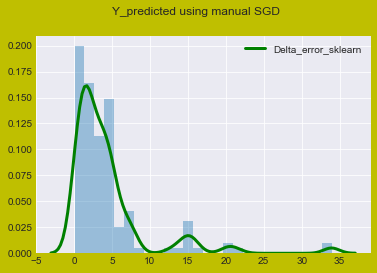

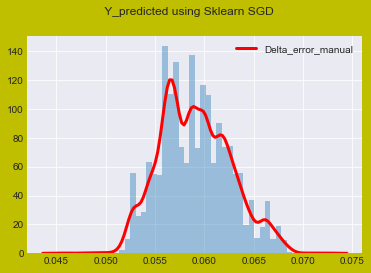

In [46]:
y_hat_cal(delta_error,delta_Error)


In [47]:
def y_skl_maual(y_hat_sklearn,y_hat_maunal):
    fig41 = plt.figure( facecolor='y', edgecolor='k')
    fig41.suptitle('Delta_error using manual SGD Vs Delta_error using Sklearn SGD ', fontsize=12)
    
    sns.set_style('whitegrid')
    Y_sklearn=np.array(sum(y_hat_sklearn)/len(y_hat_sklearn))
    Y_manual=np.array(scale*sum(y_hat_maunal)/len(y_hat_maunal))
    #print(Y_manual[0])

    sns.kdeplot(Y_sklearn,shade=True, color="c", bw=0.5,label='Y_hat_sklearn')
    sns.kdeplot(Y_manual[0],shade=True, color="r", bw=0.5,label='Y_hat_manual')


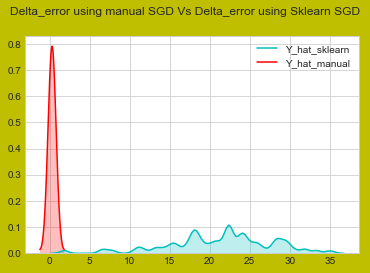

In [48]:
y_skl_maual(Y_hat_Predicted,y_hat_manual_SGD)


In [49]:
columns = ["Model","Batch_Size","RMSE","MSE", "Iteration", "Optimal learning Rate"]
pd.DataFrame(models_performence1, columns=columns)


,Model,Batch_Size,RMSE,MSE,Iteration,Optimal learning Rate
0,sklearn.linear_model.SGDRegressor,150,5.380455,28.949299,100.0,9.094947e-13


### Observation

* In stochastic gradient descent Manual model(a user designed model),RMSE(root mean squared error ) is varied as compared to sklearn designed stochastic gradient descent model for varied number of batch_size.

* Graphs between learning rate vs RMSE & Epoch Vs RMSE are plotted.

* From the graph , stochastic gradient descent model performance can be observed .

### Comparision of SGD_sklearn and SGD_manual with batch_size=150 :-
 * Distributions Plots for  errors(y - y_hat) and It is overlapping as shown in graph "y_hat_cal(delta_error,delta_Error)".Seperate distribuation plots for both of implementations are plotted below it.
 
 * "Delta_error using manual SGD Vs Delta_error using Sklearn SGD" graph is plotted .Varience(spread) of Blue graph(SGD sklearn) is high as comapared to spread of Red graph (manual SGD ) .

 * RMSE Vs epoch for manual SGD graph looks like almost "L" shape.So, Model doesn't leads to overfitting. In case od SGD sklearn , it is  straight vertical line at epoch.

 * RMSE value and MSE value for batch_size 150 is almost similar as seen in above table

* *  Optimal learning rate is low for SGD sklearn and 1 which high in this case is for SGD manual.